In [86]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
df = pd.read_csv('indian_food_cleaned.csv')

In [88]:
df.head()

,name,ingredients,diet,prep_time,cook_time,flavour,dish_type,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,west bengal,east
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,rajasthan,west
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,punjab,north
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,rajasthan,west
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,west bengal,east


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         255 non-null    object
 1   ingredients  255 non-null    object
 2   diet         255 non-null    object
 3   prep_time    255 non-null    int64 
 4   cook_time    255 non-null    int64 
 5   flavour      255 non-null    object
 6   dish_type    255 non-null    object
 7   state        255 non-null    object
 8   region       255 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [90]:
df['diet'] = df['diet'].astype('category')
df['flavour'] = df['flavour'].astype('category')

In [91]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   name         255 non-null    object  
 1   ingredients  255 non-null    object  
 2   diet         255 non-null    category
 3   prep_time    255 non-null    int64   
 4   cook_time    255 non-null    int64   
 5   flavour      255 non-null    category
 6   dish_type    255 non-null    object  
 7   state        255 non-null    object  
 8   region       255 non-null    object  
dtypes: category(2), int64(2), object(5)
memory usage: 14.9+ KB


,prep_time,cook_time
count,255.000000,255.000000
mean,33.047059,35.788235
std,65.687804,18.509900
min,5.000000,2.000000
25%,10.000000,25.000000
50%,15.000000,30.000000
75%,27.000000,40.000000
max,500.000000,120.000000


UNIVARIATE ANALYSIS


1. Name

In [92]:
df['name'].nunique()

255

2. Ingredients 
- avg 7-8 ingredients per dish


In [93]:
df['ingredients'].str.split().str.len().describe()

#average 7 ingredients per dish


count    255.000000
mean       7.231373
std        2.512449
min        2.000000
25%        6.000000
50%        8.000000
75%        9.000000
max       13.000000
Name: ingredients, dtype: float64

<Axes: ylabel='Frequency'>

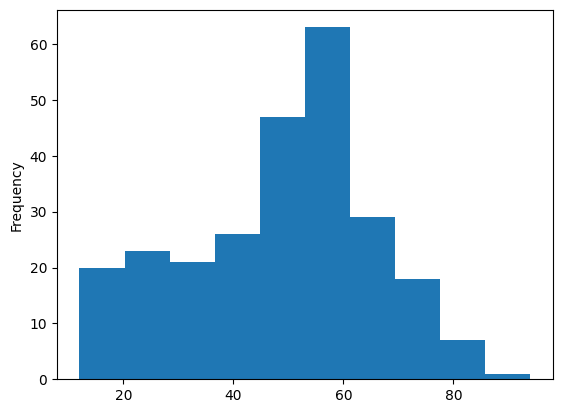

In [94]:
df['ingredients'].str.len().plot(kind='hist')

3. diet
- veg dominating list

In [95]:
df['diet'].value_counts()

diet
vegetarian        226
non vegetarian     29
Name: count, dtype: int64

In [96]:
#percentage 
round(df['diet'].value_counts(normalize=True)*100, 2)

diet
vegetarian        88.63
non vegetarian    11.37
Name: proportion, dtype: float64

<Axes: xlabel='diet'>

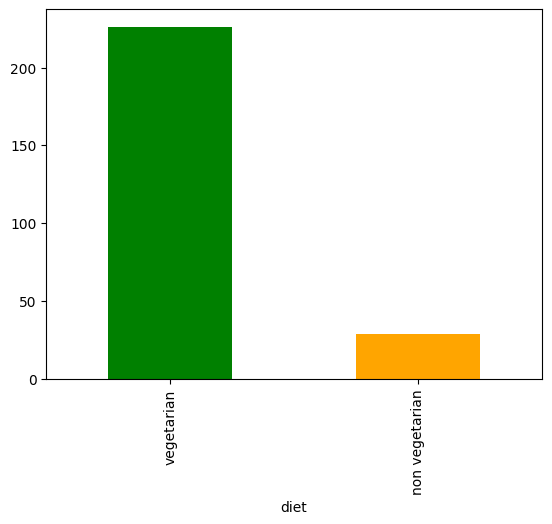

In [97]:
#Plot
df['diet'].value_counts().plot(kind='bar', color=['green', 'orange'])

4. prep time
- avg time for prep is 30-35 min
- valid outliers

In [98]:
df['prep_time'].describe()

count    255.000000
mean      33.047059
std       65.687804
min        5.000000
25%       10.000000
50%       15.000000
75%       27.000000
max      500.000000
Name: prep_time, dtype: float64

<Axes: xlabel='prep_time'>

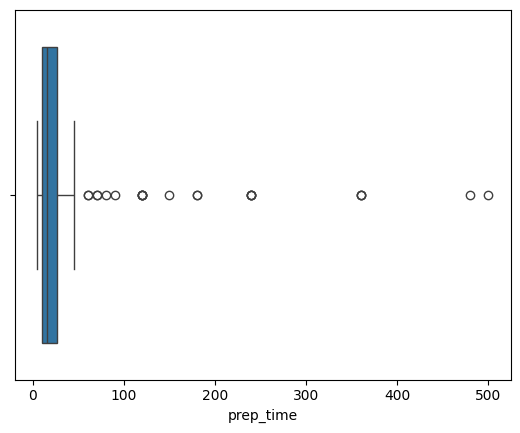

In [99]:
sns.boxplot(x=df['prep_time'])
#valid outliers

5. cook time
- avg time for cook is 30-35 min
- valid outliers

In [100]:
df['cook_time'].describe()

count    255.000000
mean      35.788235
std       18.509900
min        2.000000
25%       25.000000
50%       30.000000
75%       40.000000
max      120.000000
Name: cook_time, dtype: float64

<Axes: xlabel='cook_time'>

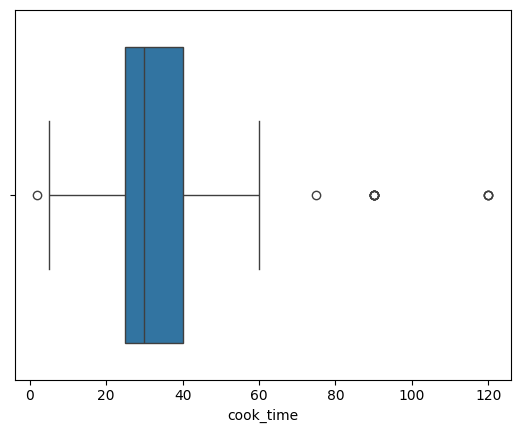

In [101]:
sns.boxplot(x=df['cook_time'])
#valid outliers

6. flavour
- 50% dishes are spicy

<Axes: xlabel='flavour'>

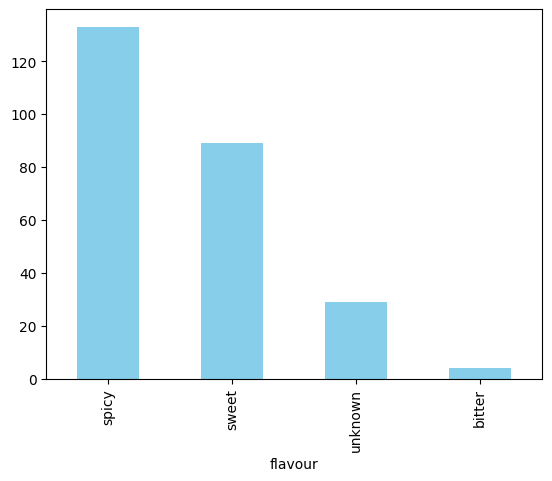

In [102]:
df['flavour'].value_counts()
df['flavour'].value_counts().plot(kind='bar', color='skyblue')

<Axes: ylabel='count'>

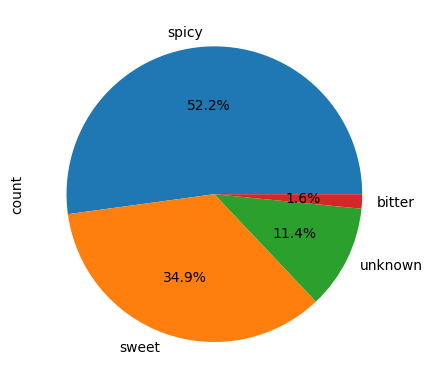

In [103]:
df['flavour'].value_counts().plot(kind= 'pie', autopct = '%0.1f%%')

7. dish_type
- 50% are main dish

<Axes: xlabel='dish_type'>

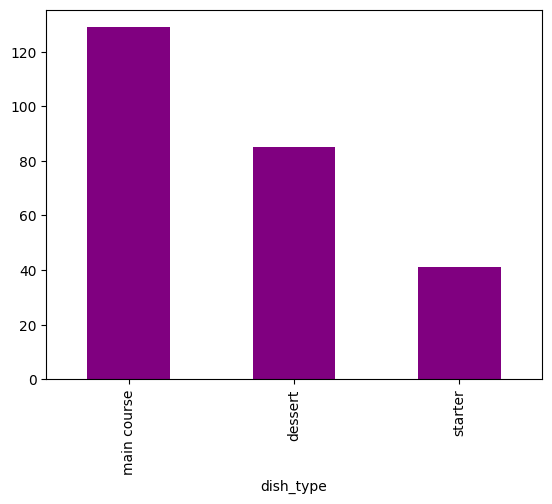

In [104]:
df['dish_type'].value_counts()
df['dish_type'].value_counts().plot(kind='bar', color='purple')

<Axes: ylabel='count'>

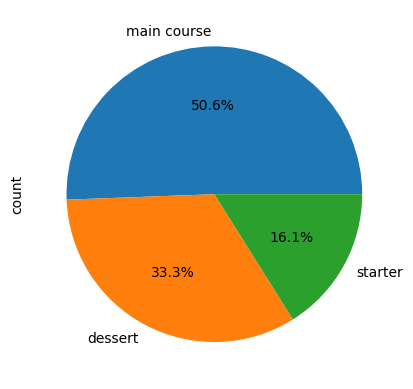

In [105]:
df['dish_type'].value_counts().plot(kind='pie', autopct='%0.1f%%')

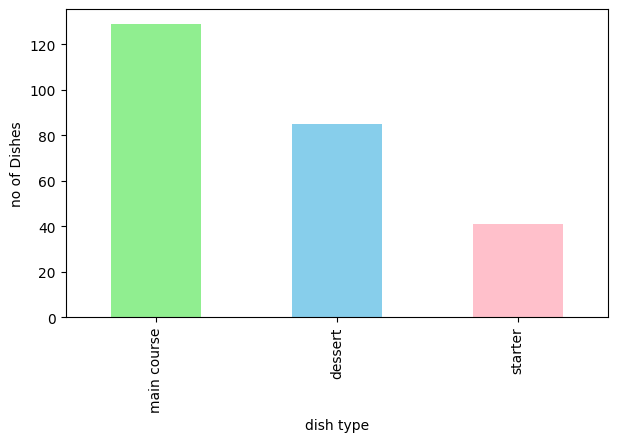

In [106]:
# dishes per category

df['dish_type'].value_counts().plot(kind='bar',color=['lightgreen', 'skyblue', 'pink'],
    figsize=(7,4)
)
plt.xlabel("dish type")
plt.ylabel("no of Dishes")
plt.show()

8. state 
- gujarat, punjab, maharashtra are the dominating ones

In [107]:
df['state'].nunique()    # 25
df['state'].value_counts().head(10)

state
gujarat           37
maharashtra       33
punjab            33
tamil nadu        28
west bengal       24
assam             21
uttar pradesh     12
andhra pradesh    11
kerala            11
rajasthan          7
Name: count, dtype: int64

<Axes: xlabel='state'>

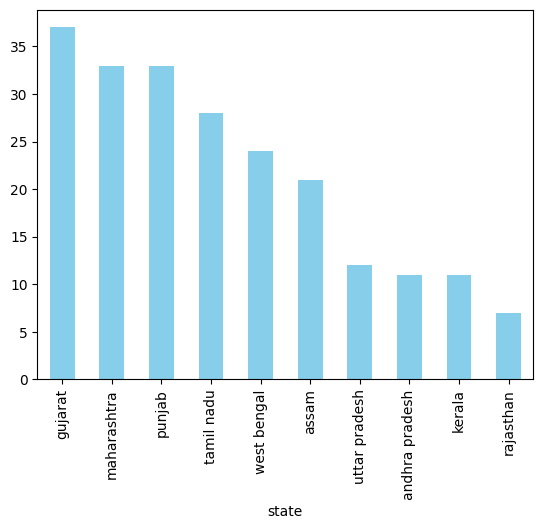

In [108]:
df['state'].value_counts().head(10).plot(kind='bar', color='skyblue')

9. region 
- unexpectedly northeast region have the less number of dishes
- other half of india dominating the list ( west, south)

In [109]:
df['region'].nunique()   # 6


6

In [110]:
round(df['region'].value_counts(normalize=True)*100, 2)

region
west          31.37
south         24.31
north         21.18
east          12.16
north east     9.80
central        1.18
Name: proportion, dtype: float64

<Axes: xlabel='region'>

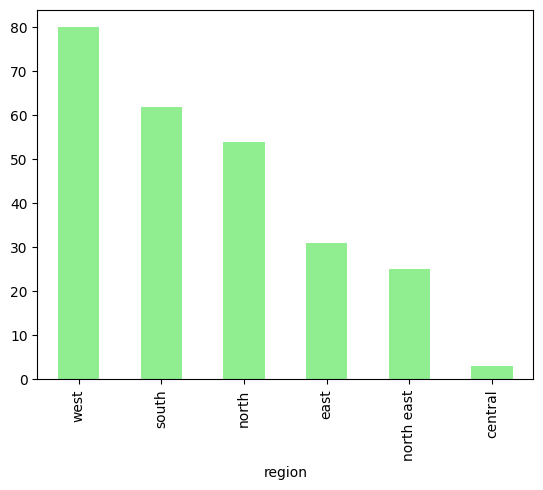

In [111]:
df['region'].value_counts().plot(kind='bar', color='lightgreen')

<Axes: ylabel='count'>

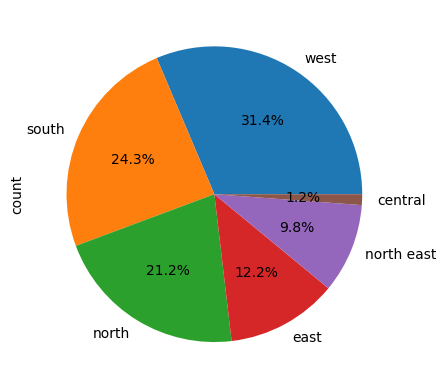

In [112]:
df['region'].value_counts().plot(kind='pie', autopct='%0.1f%%')

BIVARIATE ANALYSIS

In [113]:
#total_time column
df['total_time'] = df['prep_time'] + df['cook_time']
df.insert(5, 'total_time', df.pop('total_time'))

In [114]:
df.head()

,name,ingredients,diet,prep_time,cook_time,total_time,flavour,dish_type,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,70,sweet,dessert,west bengal,east
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,110,sweet,dessert,rajasthan,west
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,75,sweet,dessert,punjab,north
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,45,sweet,dessert,rajasthan,west
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,55,sweet,dessert,west bengal,east


In [ ]:
#diet vs total_time
# diet vs region
# diet vs state
# diet vs flavour 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13680\1264136625.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('diet')['total_time'].mean().plot(kind='bar')


<Axes: xlabel='diet'>

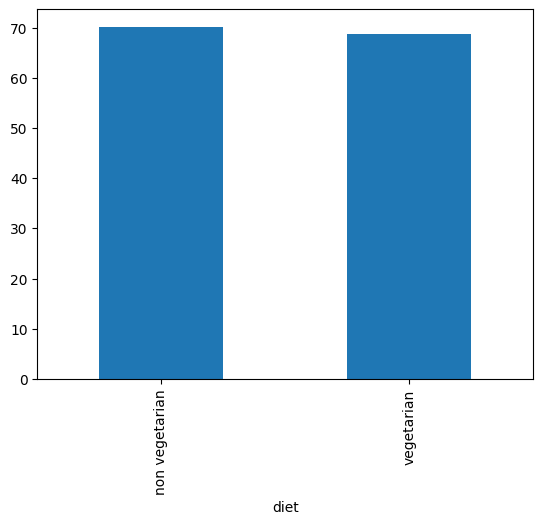

In [ ]:
# diet vs total_time
df.groupby('diet')['total_time'].mean().plot(kind='bar')

# not so different

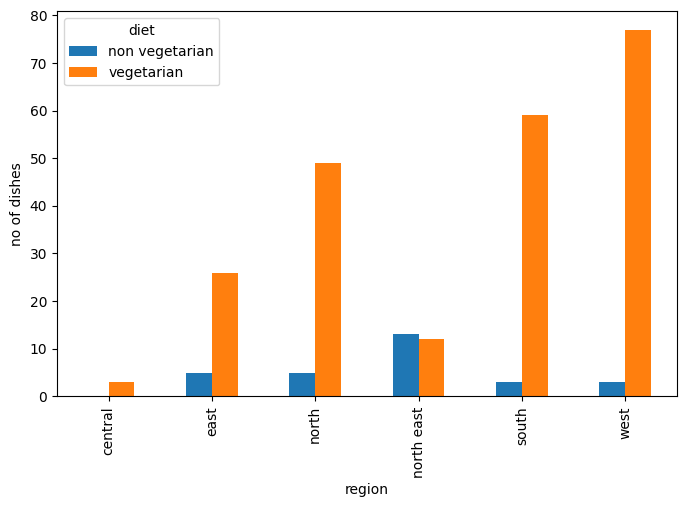

In [138]:
# diet vs region
df.groupby('region')['diet'].value_counts().unstack().plot(kind='bar', figsize=(8,5))
plt.ylabel("no of dishes")
plt.show()

# valid differences coz rajasthan, gujarat are veg dominant regions

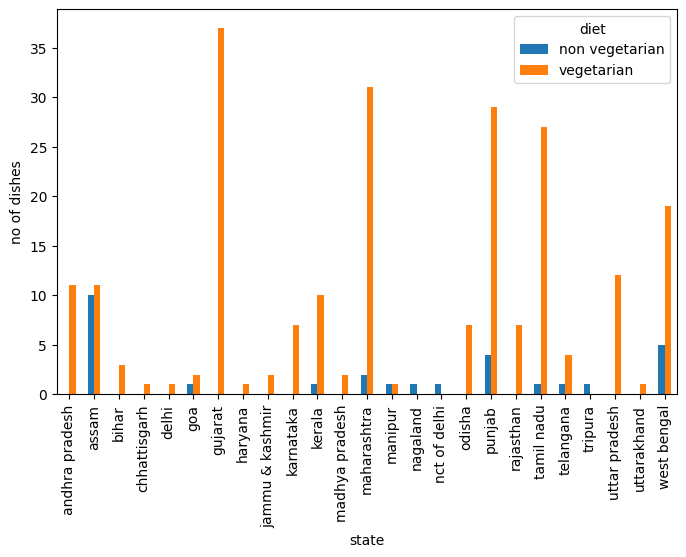

In [ ]:
# diet vs state
df.groupby('state')['diet'].value_counts().unstack().plot(kind='bar', figsize=(8,5))
plt.ylabel("no of dishes")
plt.show()



in graph tamilnadu is purely vegetarian state but in reality it is not 
same goes for maharashtra, andhra, west bengal, punjab and UP

- two possible reason
1. cleaning or assessing problem
2. or may be dataset created in this way 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13680\1605607637.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('diet')['flavour'].value_counts().unstack().plot(kind='bar', figsize=(8,5))


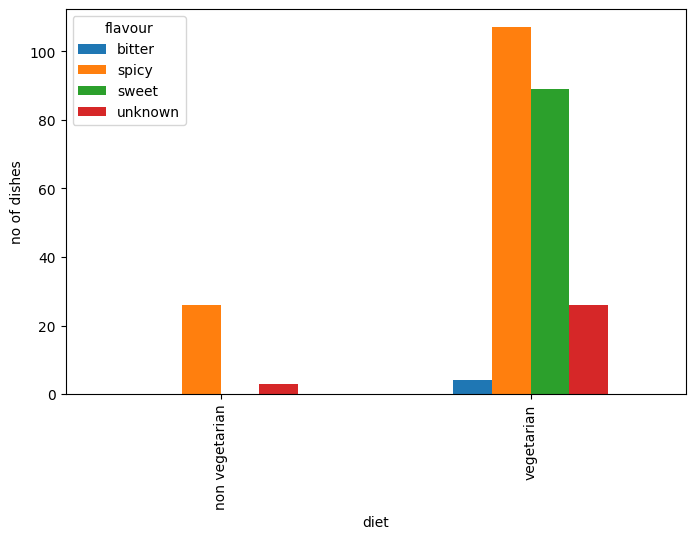

In [ ]:
# diet vs flavour
df.groupby('diet')['flavour'].value_counts().unstack().plot(kind='bar', figsize=(8,5))
plt.ylabel('no of dishes')
plt.show()

# non veg dishes are not sweet dishes at all

In [ ]:
#total_time vs flavour
#total_time vs dish_type
#total_time vs region

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13680\2854383159.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('flavour')['total_time'].mean().plot(kind='bar')


<Axes: xlabel='flavour'>

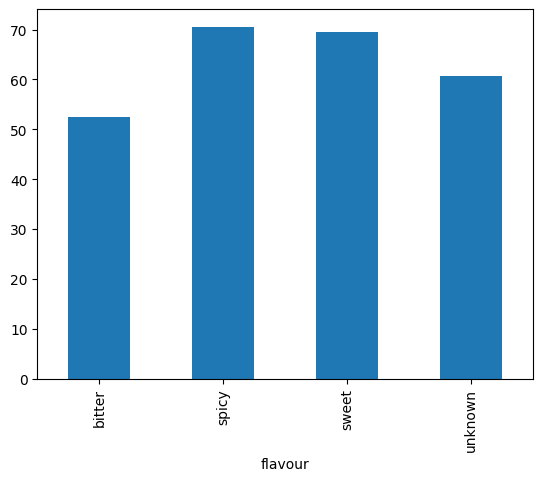

In [ ]:
#total_time vs flavour
df.groupby('flavour')['total_time'].mean().plot(kind='bar')


# both sweet and spicy are almost take same time


<Axes: xlabel='dish_type'>

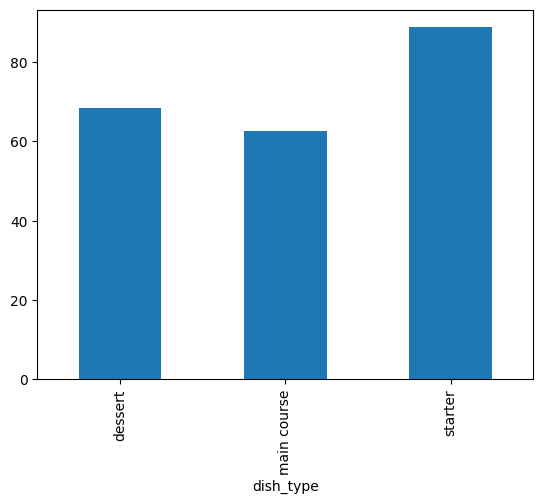

In [ ]:
#total_time vs dish_type
df.groupby('dish_type')['total_time'].mean().plot(kind='bar')

# generally starter take more time

<Axes: xlabel='region'>

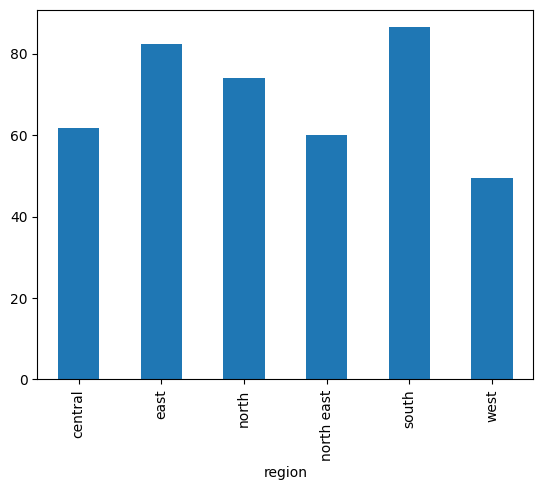

In [ ]:
#total_time vs region
df.groupby('region')['total_time'].mean().plot(kind='bar')


In [ ]:
# flavour vs dish_type 
#2. flavour vs region 
#4. flavour vs diet

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13680\1088458068.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('flavour')['dish_type'].value_counts().unstack().plot(kind='bar')


<Axes: xlabel='flavour'>

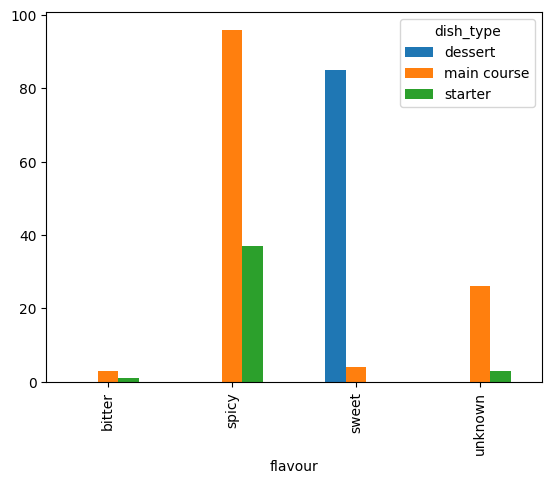

In [ ]:
## flavour vs dish_type 
df.groupby('flavour')['dish_type'].value_counts().unstack().plot(kind='bar')

# starter - spicy
# main - spicy
# dessert - sweet

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13680\2140408214.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('flavour')['region'].value_counts().unstack().plot(kind='bar')


<Axes: xlabel='flavour'>

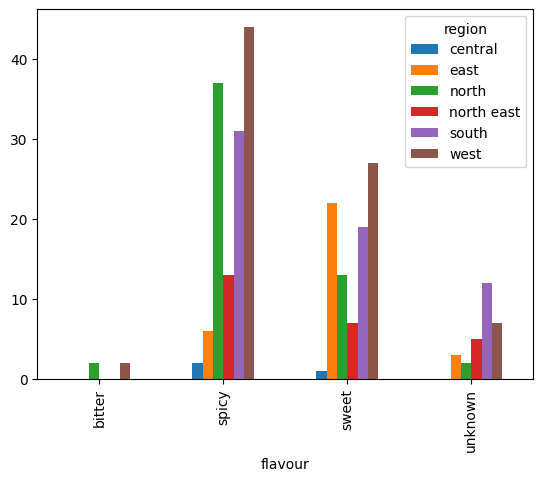

In [155]:
# flavour vs region
df.groupby('flavour')['region'].value_counts().unstack().plot(kind='bar')

# spicy dominant in west,north, south regions

<Axes: xlabel='dish_type'>

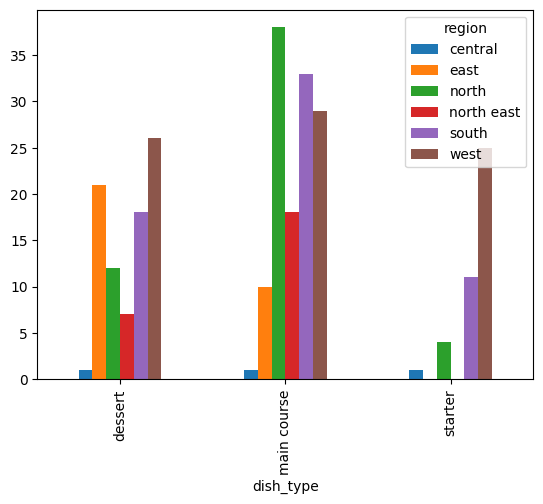

In [ ]:
#dish_type vs region
df.groupby('dish_type')['region'].value_counts().unstack().plot(kind='bar')

# northest doesn't like starter at all
# same for north
# south likes main course 

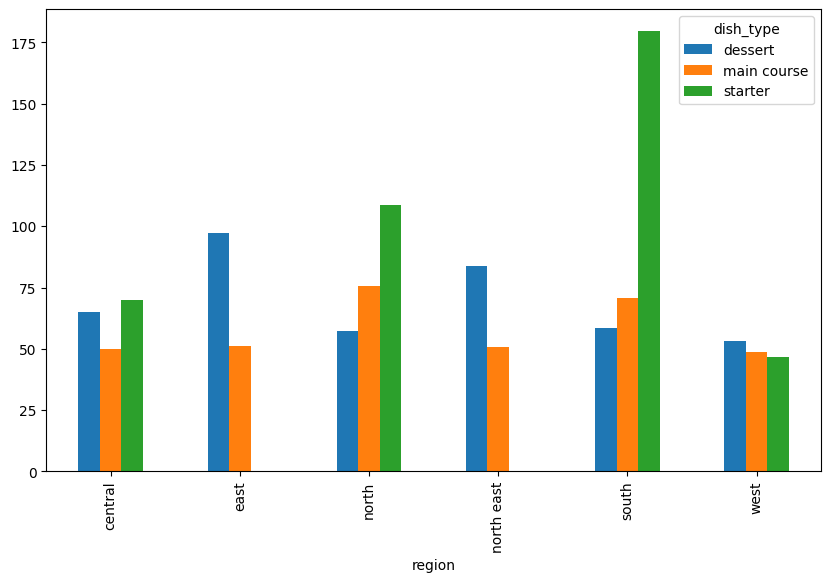

In [ ]:
# multivariate analysis (region, dish_type vs total_time)
pd.crosstab(df['region'], df['dish_type'],values=df['total_time'],aggfunc='mean').round(1).plot(kind='bar', figsize=(10,6))

plt.show()

# south starter dishes take more time